# Phase 1 Project

# Introduction

In today's dynamic film industry, staying abreast of emerging trends is paramount for any studio looking to make a mark. As requested by stakeholders, this report delves into an analysis of recent film trends to provide valuable insights for the launch of a new studio. By examining the types of films that have been performing well, we aim to equip stakeholders with actionable information to guide strategic decision-making

## Overview

The primary objective of this report is to identify and analyze recent trends in the film industry, particularly focusing on the types of films that have garnered success. Through data-driven analysis, we aim to provide stakeholders with a comprehensive understanding of audience preferences and market dynamics, thereby informing the strategic direction for the launch of a new studio.


# Explore the tmdb movies dataset with Pandas

### Data Understanding

Each record (row) in this dataset represents movies that did well in box office.

Each feature (column) in this dataset is some attribute of the movies.

We are going to focus on the following features:

**original_title**: `The title of the movies`

**popularity**: `The percentage of how the movies are popular among box office users`

**Vote_average**: ` average rating given to a movie by viewers from a scale of 0 to 10`

**vote_count**: `The number of individual votes or ratings that a movie has received from viewers.Total number of people who have rated the movie`

In [5]:
import pandas as pd
import numpy as np
from numbers import Number
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv ('data/tmdb.movies.csv', index_col=0)
df

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [7]:
print(df.dtypes)

genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [9]:
df.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [13]:
from scipy.stats import pearsonr


In [21]:
#Calculate the correlation matrix for the specified columns
correlation_matrix = df[['popularity', 'vote_average', 'vote_count']].corr()

# Display the correlation matrix
print(correlation_matrix)

              popularity  vote_average  vote_count
popularity      1.000000      0.065273    0.694849
vote_average    0.065273      1.000000    0.086370
vote_count      0.694849      0.086370    1.000000


#### List of `top_10_popular_movies` containing the names of the 10 movies with the most popularity,vote count and vote average (using the `'popularity'`,`'vote_average'` ,`'vote_count'` column).

In [96]:
# Sort the DataFrame by popularity in descending order and select the top 10 rows
top_10_popular_movies = df.nlargest(10, 'popularity')

# Select only the 'title' and 'popularity' columns
top_10_popular_movies = top_10_popular_movies[['title', 'popularity']]

# Reset the index to start from 1
top_10_popular_movies.reset_index(drop=True, inplace=True)
top_10_popular_movies


,title,popularity
0,Avengers: Infinity War,80.773
1,John Wick,78.123
2,Spider-Man: Into the Spider-Verse,60.534
3,The Hobbit: The Battle of the Five Armies,53.783
4,The Avengers,50.289
5,Guardians of the Galaxy,49.606
6,Blade Runner 2049,48.571
7,Blade Runner 2049,48.571
8,Fantastic Beasts: The Crimes of Grindelwald,48.508
9,Ralph Breaks the Internet,48.057


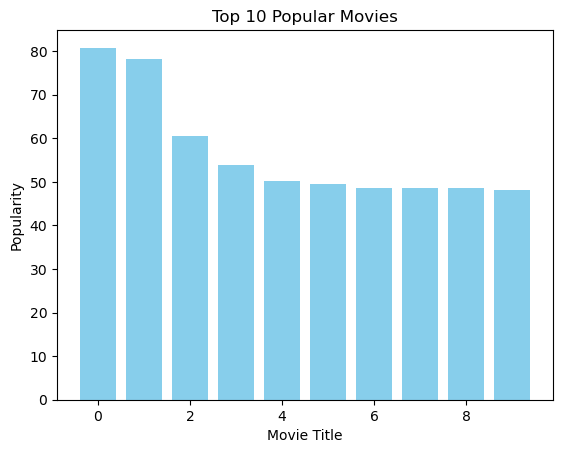

In [97]:
plt.bar(top_10_popular_movies.index, top_10_popular_movies['popularity'], color='skyblue')
plt.title('Top 10 Popular Movies')
plt.xlabel('Movie Title')
plt.ylabel('Popularity')
plt.show()

In [2]:
# Sort the DataFrame by vote count in descending order and select the top 10 rows
top_10_movies = df.nlargest(10, 'vote_count')

# Select only the 'title' and 'popularity' columns
top_10_movies = top_10_movies[['title', 'vote_count']]

# Reset the index to start from 1
top_10_movies.reset_index(drop=True, inplace=True)
top_10_movies

NameError: name 'df' is not defined

# Explore the tn.movie_budgets dataset with Pandas

### Data Understanding

Each record (row) in this dataset represents movies that did well in box office.

Each feature (column) in this dataset is some attribute of the movies.

We are going to focus on the following features:

**original_title**: `The title of the movies`

**popularity**: `The percentage of how the movies are popular among box office users`

**Vote_average**: ` average rating given to a movie by viewers from a scale of 0 to 10`

**vote_count**: `The number of individual votes or ratings that a movie has received from viewers.Total number of people who have rated the movie`

In [99]:
# Read the CSV file into a DataFrame
df = pd.read_csv ('data/tn.movie_budgets.csv', index_col=0)
df

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


In [100]:
# Display the data types of each column
print(df.dtypes)

release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object


# Explore the bom.movies_gross dataset with Pandas

### Data Understanding

Each record (row) in this dataset represents movies that did well in box office.

Each feature (column) in this dataset is some attribute of the movies.

We are going to focus on the following features:

**original_title**: `The title of the movies`

**popularity**: `The percentage of how the movies are popular among box office users`

**Vote_average**: ` average rating given to a movie by viewers from a scale of 0 to 10`

**vote_count**: `The number of individual votes or ratings that a movie has received from viewers.Total number of people who have rated the movie`

In [101]:
# Read the CSV file into a DataFrame
df = pd.read_csv ('data/bom.movie_gross.csv', index_col=0)
df

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...
The Quake,Magn.,6200.0,NaN,2018
Edward II (2018 re-release),FM,4800.0,NaN,2018
El Pacto,Sony,2500.0,NaN,2018


In [102]:
print(df.dtypes)

studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object


In [105]:
# Read the CSV file into a DataFrame
df = pd.read_csv ('data/rt.movie_info.tsv', index_col=0)
df

ParserError: Error tokenizing data. C error: Expected 25 fields in line 7, saw 28
